# KNN Exercise
Note: This exercise closely follows the post by Scott Fortmann-Roe about bias-variance tradeoff (see references below). It is recommended that you think about each of the questions before referring to that essay.

In this exercise you will get more familiar with a **non-parametric** learning algorithm, an implement k-Nearest Neighbours (kNN). You will then analyse the bias-variance tradeoff and try to come up with the optimal kNN classifier for the given data.

**Note: You MAY NOT use Sklearn for anything besides comparison or debugging, train-test splitting, and K-Fold cross validation.**

For this exercise we will use hypothetical and artificial generated data.


## Implement k-Nearest Neighbours (kNN)

For this task, assume each data point is an n-dimensional point in $\mathbb{R}^n$, and each label is either -1 or 1.

**Question 1:** Implement a class called KNNClassifier and three methods:
- `fit`: should receive the training data (an array of shape [n_samples, n_features]) and their labels (array of shape [n_samples]).
- `predict`: should receive a set of data (an array of shape [n_samples, n_features]) and **return** their predicted labels (array of shape [n_samples]).
- `score`: should receive the training data (an array of shape [n_samples, n_features]) and their labels (array of shape [n_samples]), and **return** the score of the model (accuracy).


Use simple Euclidean distance to measure the distance between two points. In case two points in the training have the same distance from a given point to predict, the nearest would be the one appearing first in the training set.

Use majority vote between all kNN of a point to predict its label. In case the vote of all kNN is tied, you may predict whichever label you wish.

You may look up [sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for reference.

**Make sure you are using numpy vectorization for this exercise! This is a must. You may ONLY use one loop in the predict function, and only there**

**Hint**: `fit` does not need to implement any classification logic, only to save the training data and their labels in class attributes of the specific instance (*KNNClassifier.data*, *KNNClassifier.labels*). The classification logic should be implemented in `predict`.


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
class kNNClassifier:

  def __init__(self, n_neighbors):
    self.n_neighbors = n_neighbors
    self.data = None
    self.labels = None

  def fit(self, X, y):
    self.data = X
    self.labels = y

  def predict(self, X):
    y_pred = np.empty(X.shape[0], dtype=self.labels.dtype)
    X_train = self.data
    y_train = self.labels
    for i in range(X.shape[0]):
      dist = np.linalg.norm(X_train - X[i], axis = 1)
      argmin_indices = np.argsort(dist)[:self.n_neighbors]
      unique_labels, counts = np.unique(self.labels[argmin_indices], return_counts=True)
      majority_label = unique_labels[np.argmax(counts)]
      y_pred[i] = majority_label

    return y_pred

  def score(self, X, y):
    y_test = self.predict(X)
    return (y_test == y).mean()

  def get_params(self, deep=True):
      return {'n_neighbors': self.n_neighbors}



## Learn and evaluate kNN algorithm on artificial data
kNN is a **non-parametric** in the sense that no inner parameter of the model is learned by the sample training set. However, the number of neighbours **k is considered a hyper-parameter**, and choosing the optimal value of k musst consider the balance between bias and variance as discussed in class.




### An applied example: voter party registration

In this example, each voter is described by a vector of two features $(x_0, x_1)$, where $x_0$ describes how wealthy that voter is, and $x_1$ describes how religious the voter is. Label $y=1$ represents a Republican voter, and $y=-1$ represents a Democrat voter.

Use the given function `generate_data(m)` to create m samples with m labels. The labels are created using the following function:

$$
y = \text{sign}\left(x_1 - 0.1\times((x_0-5)^3-x_0^2+(x_0 − 6)^2+80)\right)
$$

and then a small fraction of the labels (chosen randomly, up to 10%) are flipped to represent unknown effect of features which are not measured. The sign of 0 is defined as 1 for this case.


Below is an example of generating 500 samples, and plotting them.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def true_boundary_voting_pred(wealth, religiousness):
  return religiousness-0.1*((wealth-5)**3-wealth**2+(wealth-6)**2+80)

def generate_data(m, seed=None):
  # if seed is not None, this function will always generate the same data
  np.random.seed(seed)

  X = np.random.uniform(low=0.0, high=10.0, size=(m,2))
  y = np.sign(true_boundary_voting_pred(X[:,0], X[:,1]))
  y[y==0] = 1
  samples_to_flip = np.random.randint(0,m//10)
  flip_ind = np.random.choice(m, samples_to_flip, replace=False)
  y[flip_ind] = -y[flip_ind]
  return X, y

def plot_labeled_data(X, y, no_titles=False):
  republicans = (y==1)
  democrats = (y==-1)
  plt.scatter(X[republicans,0], X[republicans,1], c='r')
  plt.scatter(X[democrats,0], X[democrats,1], c='b')
  if not no_titles:
    plt.xlabel('Wealth')
    plt.ylabel('Religiousness')
    plt.title('Red circles represent Republicans, Blues Democrats')

  plt.xlim([0, 10]);
  plt.ylim([0, 10]);
  plt.plot(np.linspace(0,10,1000), -true_boundary_voting_pred(np.linspace(0,10,1000), np.zeros(1000)), linewidth=2, c='k');

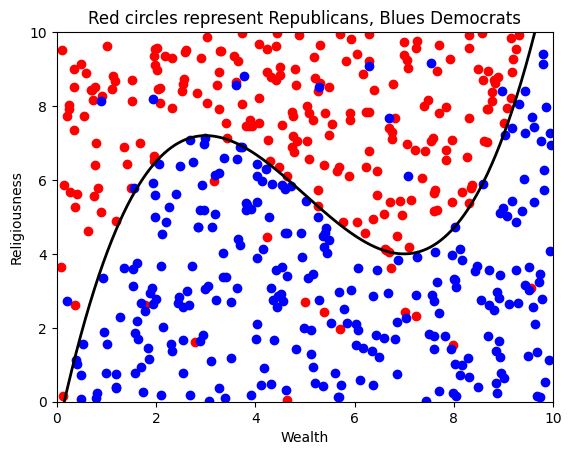

In [4]:
# Play this several times to see different sampling sets
X, y = generate_data(m=500)
plot_labeled_data(X, y)
plt.show()


### Analyse the properties of kNN
**Question 2:** Generate multiple sample data sets of size 500 (use the given function above), and plot the decision plane for increasing values of k (e.g.: 1, 3, 5, 11, 21, 51, 99).

The decision plane should cover the range [0,10] for both axes, coloring the patches that would be classified as Republicans or Democrats in two colors. It should look something like [that](https://drive.google.com/open?id=1jMD7I9sWT4w4O48pjwSPCFL1NLLPo10j). **Hint:** Use `np.meshgrid` for the plot ([documentation and example](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)), and take inspiration from the code [here]( https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py).





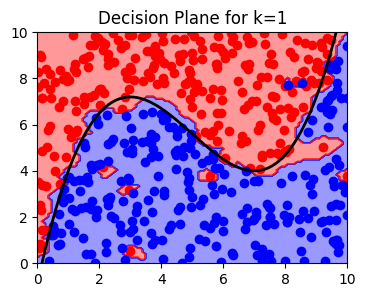

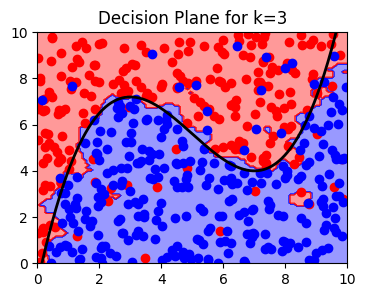

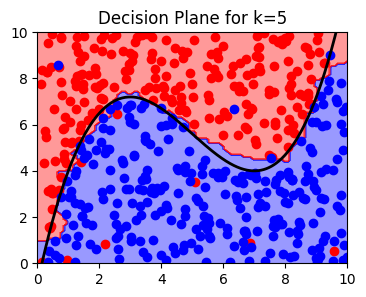

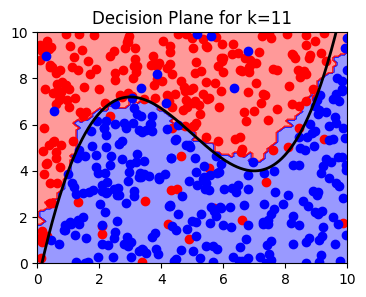

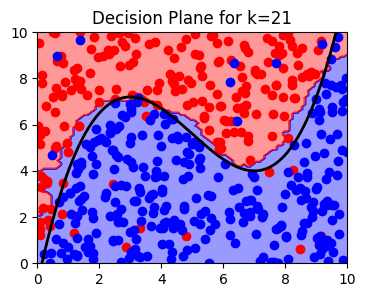

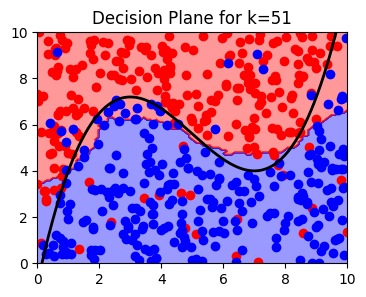

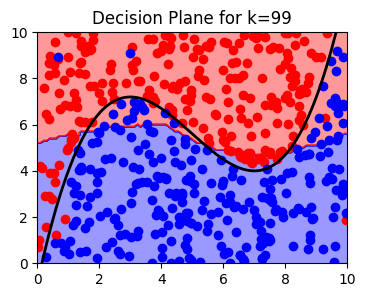

In [5]:
# your code here
ks = [1, 3, 5, 11, 21, 51, 99]
xx,yy = np.meshgrid(np.linspace(0,10,100), np.linspace(0,10,100))
for k in ks:
  X,y = generate_data(500)
  knnclass = kNNClassifier(k)
  knnclass.fit(X,y)
  X_test = np.column_stack((xx.ravel(), yy.ravel()))
  y_test = knnclass.predict(X_test)
  y_test = y_test.reshape(xx.shape)

  cmap = ListedColormap(['b', 'r'])
  plt.figure(figsize=(4, 3))
  plt.contourf(xx, yy, y_test, alpha=0.4, cmap=cmap)
  plot_labeled_data(X, y, no_titles=True)
  plt.title(f"Decision Plane for k={k}")
  plt.show()









Answer the following questions:

**2.1** - How is the decision plain affected from changes in the sample set, as a function of k?

We can see that the higher k is , the lower the decision plain is accurate.

**2.2** - Can you describe when do you underfit or overfit the data?



We underfit for k >=51 and we overfit for k <= 5


**2.3** - How does the complexity of this model depends on k? (ignoring time and space complexity, and refering to the algorithm complexity)

The higher the k is, the more complex the model is. In fact, when k is high, we have a lot of distances to calculate and it gives a high complexity to our model.

### Finding the optimal k
**Question 3:**

**3.a.** Use the generate_data function to sample a single sample set of size 1000 and divide it randomly to train (0.6) / validation (0.2) / test (0.2) sets.



In [6]:
# your code here
X,y = generate_data(1000)
X_train,X_temp,y_train,y_temp = train_test_split(X,y, test_size = 0.4,random_state = 42)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size = 0.5, random_state = 42)


**3.b.** Calculate the train and validation errors per k using the knn.score function. The error would be 1-accuracy for the given dataset.


In [7]:
# your code here
error_train = []
error_val = []
for k in ks :
  knnclass1 = kNNClassifier(k)
  knnclass1.fit(X_train,y_train)
  error_train.append(1 - knnclass1.score(X_train,y_train))

  knnclass2 = kNNClassifier(k)
  knnclass2.fit(X_val,y_val)
  error_val.append(1 - knnclass2.score(X_val,y_val))

error_train,error_val



([0.0,
  0.043333333333333335,
  0.050000000000000044,
  0.050000000000000044,
  0.06999999999999995,
  0.11333333333333329,
  0.1266666666666667],
 [0.0,
  0.04500000000000004,
  0.06000000000000005,
  0.07499999999999996,
  0.10499999999999998,
  0.125,
  0.20499999999999996])

**3.c.** Plot the train vs validation error for several k values, and choose the best k. Why did you choose this k?



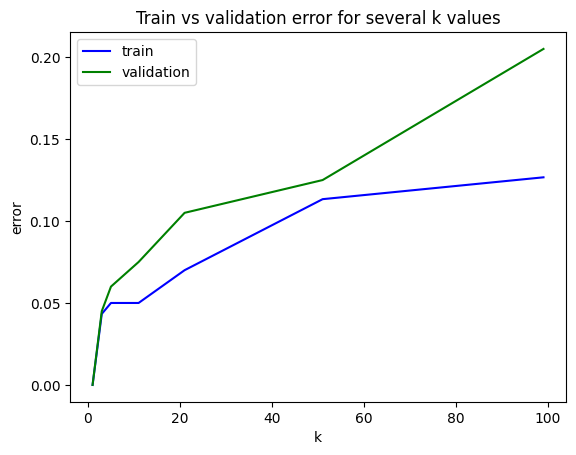

In [8]:
# your code here
f,ax = plt.subplots(1,1)
sns.lineplot(x = ks,y = error_train,color = 'blue', label = 'train')
sns.lineplot(x = ks, y = error_val, color = 'green', label = 'validation')
ax.set(xlabel = 'k', ylabel = 'error', title = 'Train vs validation error for several k values')
plt.legend()
plt.show()

k = 11 seems to be the best k. For k < 11, it seems that our model overfit the data.
For k > 11, the error is going high and we tend to underfit. So k = 11 seems to be the best value.

**3.d.** Where do you underfit/overfit the data?


We overfit the data for k < 11 and we underfit the data for k > 20

**3.e.** Finally, estimate the generalization error of your chosen classifier using the test set.


In [9]:
# your code here
knn_class = kNNClassifier(11)
knn_class.fit(X_train,y_train)
1 - knn_class.score(X_test,y_test)

0.09499999999999997

We get an error around 0.09 for our classifier using the test set.

### Using cross validation
**Question 4:** This time, put the test data aside (0.2 of the data), and apply 5-fold CV on the remaining data to evaluate the performance of each k value.
What is the size of the validation and train set now, in each CV iteration?
Did your final model selection change? Explain why.

In [10]:
# your code here
avg_acc = []
new_X = np.concatenate((X_train,X_val))
new_y = np.concatenate((y_train,y_val))
for k in ks :
  knn_class = kNNClassifier(k)
  cross_val_scores = cross_val_score(knn_class,new_X,new_y,cv = 5)
  avg_acc.append(cross_val_scores.mean())

ks[avg_acc.index(max(avg_acc))]

5

In [11]:
new_X.shape

(800, 2)

The size of the validation and train set is now (800,2) in each CV iteration.
We get k = 5 for the best model using cross validation.

As we do not use the test set, we will get better result using only the train and the validation set as our class kNNClassifier is build based on the train set. We are overfitting our data.

## References
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- http://scott.fortmann-roe.com/docs/MeasuringError.html
- http://scikit-learn.org/stable/modules/cross_validation.html
